# Setup

In [44]:
# Import packages
import pandas as pd
from ds_common_utils.aux.io.snowflake_tools import SnowflakeTools
from datetime import datetime
import matplotlib.pyplot as plt

In [45]:
# Setup connection
con = SnowflakeTools(
    role="INSIGHT_ANALYST_MERCH_DE_GENERAL_PRD",
    warehouse="INSIGHT_ANALYST_WH",
    database="BDWPRD_DE",
    schema="IA_MERCH_DE"
)

In [46]:
# Date range
start_date = "'2024-06-01'"
end_date = "'2025-05-31'"

In [47]:
# Updated function with `field` for demographic segment and `level` for groupings like sub-department
def generate_segment_charts(df, field, level):
    sub_charts = {}
    segment_order = df[field].drop_duplicates().tolist()

    for group_val in df[level].drop_duplicates():
        df_sub = df[df[level] == group_val].copy()

        df_sub[field] = pd.Categorical(df_sub[field], categories=segment_order, ordered=True)
        df_sub.sort_values(field, inplace=True)

        def get_color(index):
            if index > 1.2:
                return "green"
            elif index < 0.8:
                return "red"
            else:
                return "grey"

        colors = df_sub["SALES_INDEX"].apply(get_color)

        fig, ax = plt.subplots(figsize=(6, 4))
        bars = ax.barh(range(len(df_sub)), df_sub["SEGMENT_SALES"] / 1e6, color=colors)

        ax.set_yticks(range(len(df_sub)))
        ax.set_yticklabels(df_sub[field])

        for i, bar in enumerate(bars):
            idx_val = df_sub.iloc[i]["SALES_INDEX"]
            ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f"{idx_val:.2f}",
                    va='center', ha='left', fontsize=10, color=colors.iloc[i])

        ax.set_title(f"Sales by {field}\n{group_val}")
        ax.set_xlabel("Sales ($M)")

        # Only keep left and bottom borders
        for spine_name in ["top", "right"]:
            ax.spines[spine_name].set_visible(False)

        plt.tight_layout()
        sub_charts[group_val] = fig

    return sub_charts

# 300 PEST CONTROL

## Data

In [48]:
# Set item range table name
table_PC = 'PC_item_range' + datetime.today().strftime('%Y_%m_%d')

In [49]:
# Create temp item table
con.execute_statement_from_sql_file(
    file='sql/0-item-range.sql',
    formatting={'table_name': table_PC,
                'filter' : "AND item_department_name = '300 PEST CONTROL' "})

snowflake_tools - 2025-06-25 10:40:32.890316+10:00 - Generating new token with 'INSIGHT_ANALYST_MERCH_DE_GENERAL_PRD' role and 'SESSION:ROLE-ANY' scope...
snowflake_tools - 2025-06-25 10:40:38.647272+10:00 - Saved token with '2025-06-25 14:40:38+10:00' expiry...


## Demographic Segments (AU)

In [50]:
PC_ds = con.read_sql_file_into_pandas(
    file="sql/1-demographic-segments.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'AU' 
    }
)

In [51]:
# Check data
PC_ds.head(7)

,ITEM_SUB_DEPARTMENT_NAME,DEMOGRAPHIC_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,400 ANIMAL CONTROL,Homeowner older kids,140781.68,6471.0,4693,1998879.02,93331.0,66744,4443797.15,375096.0,...,1636550,0.070430,0.069334,0.070313,0.080047,0.077812,0.076060,0.879858,0.891041,0.924441
1,400 ANIMAL CONTROL,Homeowner younger kids,286311.48,12832.0,9338,1998879.02,93331.0,66744,9905108.74,809675.0,...,1636550,0.143236,0.137489,0.139908,0.178424,0.167964,0.162540,0.802787,0.818563,0.860760
2,400 ANIMAL CONTROL,Older homeowner,1090048.62,51809.0,36366,1998879.02,93331.0,66744,24619773.13,2184934.0,...,1636550,0.545330,0.555110,0.544858,0.443483,0.453256,0.435962,1.229652,1.224717,1.249783
3,400 ANIMAL CONTROL,Renter no kids,117877.81,5501.0,4223,1998879.02,93331.0,66744,4801854.35,441215.0,...,1636550,0.058972,0.058941,0.063272,0.086497,0.091528,0.112461,0.681779,0.643962,0.562613
4,400 ANIMAL CONTROL,Renter with kids,107291.02,4924.0,3736,1998879.02,93331.0,66744,4388092.11,395099.0,...,1636550,0.053676,0.052758,0.055975,0.079044,0.081962,0.091276,0.679060,0.643696,0.613250
5,400 ANIMAL CONTROL,Unclassifiable,17843.77,807.0,574,1998879.02,93331.0,66744,406322.40,36670.0,...,1636550,0.008927,0.008647,0.008600,0.007319,0.007607,0.007765,1.219653,1.136662,1.107534
6,400 ANIMAL CONTROL,Younger homeowner,238724.64,10987.0,7814,1998879.02,93331.0,66744,6949633.02,577839.0,...,1636550,0.119429,0.117721,0.117074,0.125186,0.119870,0.113937,0.954017,0.982067,1.027533


/tmp/ipykernel_743/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'400 ANIMAL CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 CRAWLING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 ELECTRONIC INSECT CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 FLYING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 MOSQUITO CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 PEST CONTROL OFF RANGE': <Figure size 600x400 with 1 Axes>,
 '400 RODENT PEST CONTROL': <Figure size 600x400 with 1 Axes>}

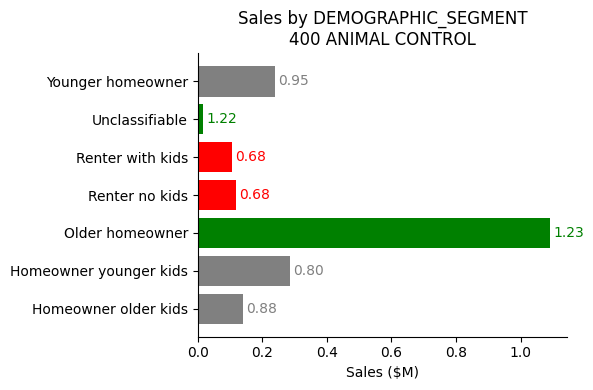

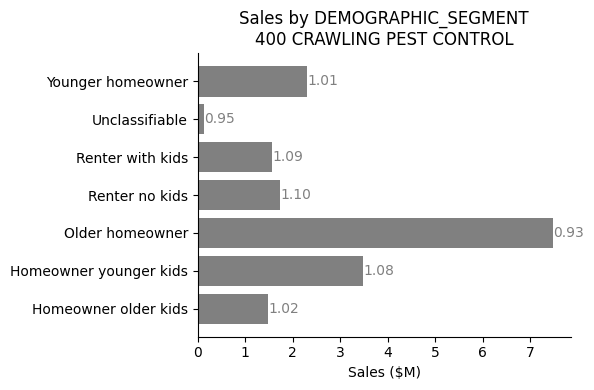

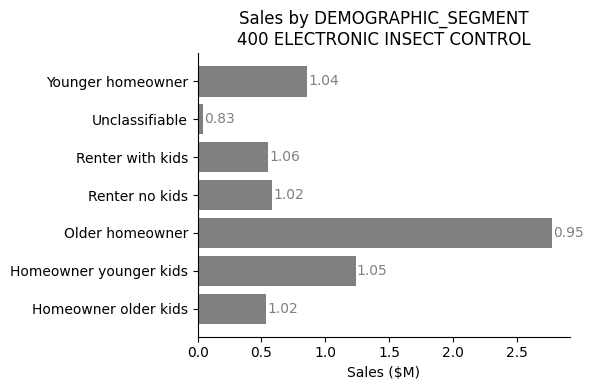

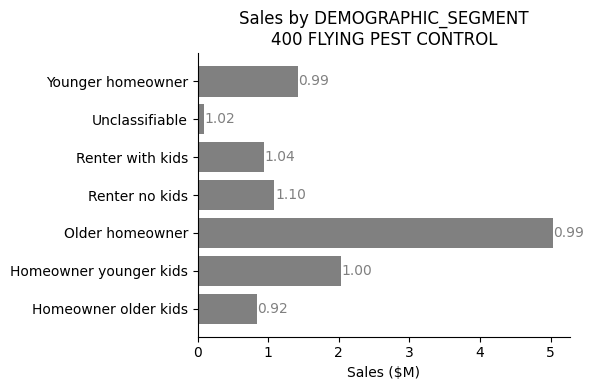

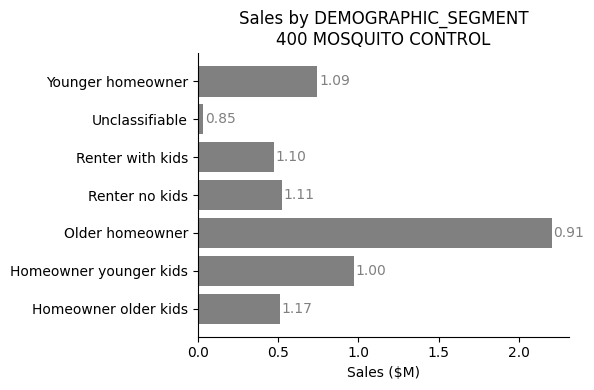

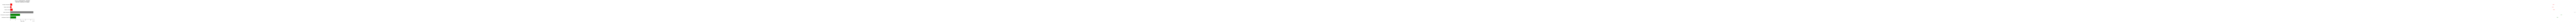

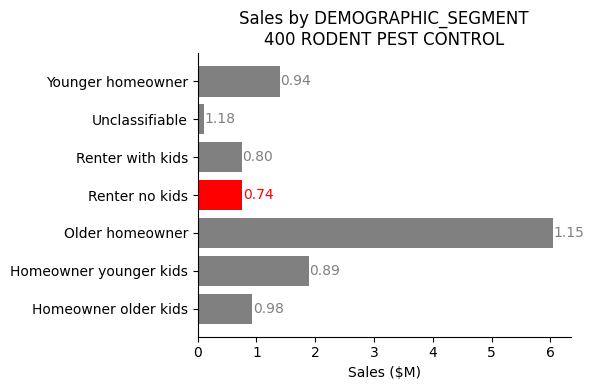

In [52]:
generate_segment_charts(df=PC_ds, field="DEMOGRAPHIC_SEGMENT", level="ITEM_SUB_DEPARTMENT_NAME")

## DIY (AU)

In [53]:
# Get data
PC_diy = con.read_sql_file_into_pandas(
    file="sql/2-diy-proficiency.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'AU' 
    }
)

In [54]:
# Check data
PC_diy.head()

,ITEM_SUB_DEPARTMENT_NAME,PROFICIENCY_GROUP,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,400 ANIMAL CONTROL,DIY Maintainer,481230.77,22954.0,16346,1768268.38,82870.0,59117,12510324.63,1106220.0,...,1377235,0.272148,0.276988,0.276503,0.260102,0.265429,0.267323,1.046315,1.043549,1.034340
1,400 ANIMAL CONTROL,DIY Master,405748.51,17350.0,12385,1768268.38,82870.0,59117,12139105.40,999014.0,...,1377235,0.229461,0.209364,0.209500,0.252384,0.239706,0.227660,0.909176,0.873421,0.920232
2,400 ANIMAL CONTROL,DIY Rookie,384758.59,19734.0,14196,1768268.38,82870.0,59117,9720575.46,889003.0,...,1377235,0.217591,0.238132,0.240134,0.202100,0.213309,0.229633,1.076648,1.116369,1.045729
3,400 ANIMAL CONTROL,DIY Skilled,496530.51,22832.0,16190,1768268.38,82870.0,59117,13727843.42,1173432.0,...,1377235,0.280800,0.275516,0.273864,0.285415,0.281556,0.275384,0.983832,0.978547,0.994480
4,400 CRAWLING PEST CONTROL,DIY Maintainer,4050325.97,327870.0,170672,15556158.55,1236260.0,635803,12510324.63,1106220.0,...,1377235,0.260368,0.265211,0.268435,0.260102,0.265429,0.267323,1.001024,0.999180,1.004160


/tmp/ipykernel_743/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'400 ANIMAL CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 CRAWLING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 ELECTRONIC INSECT CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 FLYING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 MOSQUITO CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 PEST CONTROL OFF RANGE': <Figure size 600x400 with 1 Axes>,
 '400 RODENT PEST CONTROL': <Figure size 600x400 with 1 Axes>}

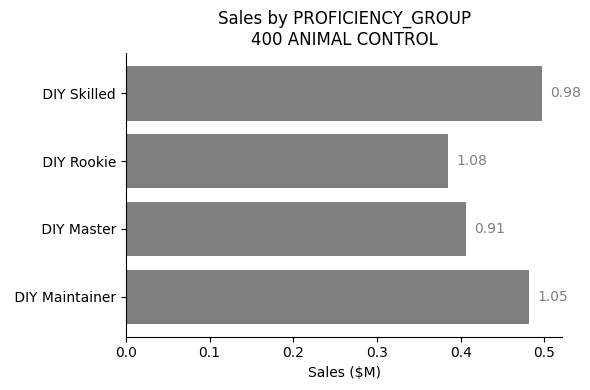

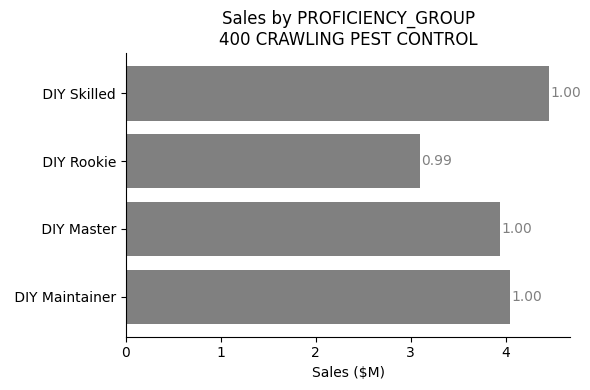

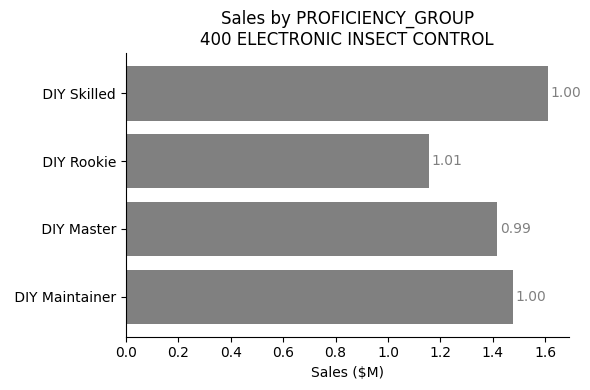

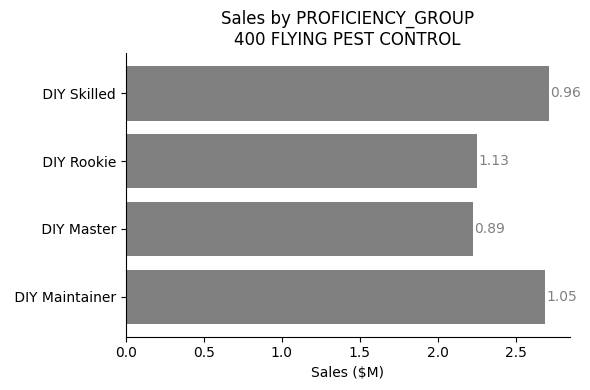

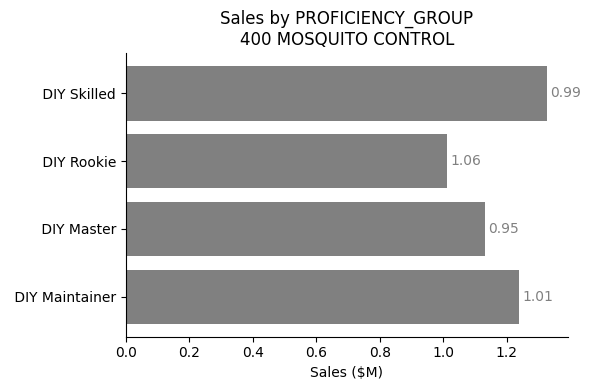

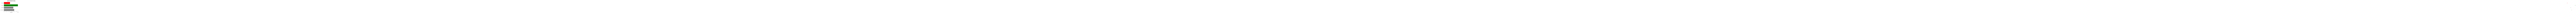

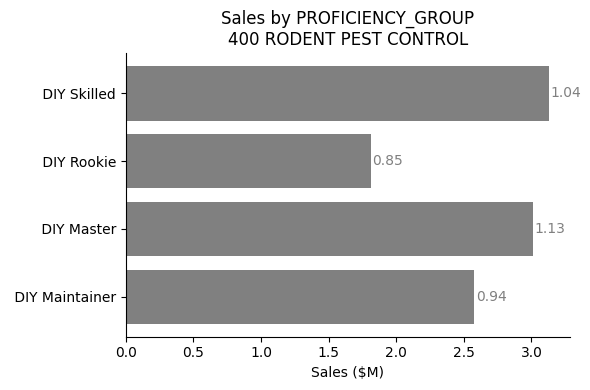

In [55]:
generate_segment_charts(df=PC_diy, field="PROFICIENCY_GROUP", level="ITEM_SUB_DEPARTMENT_NAME")

## RFM (Annual Segment) (AU)

In [56]:
# Get data
PC_rfm = con.read_sql_file_into_pandas(
    file="sql/3-rfm.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'AU' 
    }
)

In [57]:
# Check data
PC_rfm.head()

,ITEM_SUB_DEPARTMENT_NAME,ANNUAL_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,400 ANIMAL CONTROL,High Spend High Frequency,1050403.55,47068.0,31738,1933704.6,90481.0,64564,26294467.65,2190810.0,...,1525377,0.543208,0.520198,0.491574,0.498755,0.478915,0.399354,1.089128,1.086201,1.230923
1,400 ANIMAL CONTROL,High Spend Low Frequency,345157.28,14834.0,10896,1933704.6,90481.0,64564,10044677.07,831645.0,...,1525377,0.178495,0.163946,0.168763,0.190528,0.181799,0.201000,0.936846,0.901798,0.839617
2,400 ANIMAL CONTROL,Low Spend High Frequency,290618.16,15745.0,11772,1933704.6,90481.0,64564,8119812.65,781039.0,...,1525377,0.150291,0.174014,0.182331,0.154017,0.170736,0.181141,0.975807,1.019199,1.006569
3,400 ANIMAL CONTROL,Low Spend Low Frequency,247525.61,12834.0,10158,1933704.6,90481.0,64564,8261272.98,771036.0,...,1525377,0.128006,0.141842,0.157332,0.156700,0.168550,0.218505,0.816884,0.841543,0.720038
4,400 CRAWLING PEST CONTROL,High Spend High Frequency,8127181.01,625408.0,293856,17131530.0,1364983.0,704505,26294467.65,2190810.0,...,1525377,0.474399,0.458180,0.417110,0.498755,0.478915,0.399354,0.951167,0.956705,1.044462


/tmp/ipykernel_743/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'400 ANIMAL CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 CRAWLING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 ELECTRONIC INSECT CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 FLYING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 MOSQUITO CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 PEST CONTROL OFF RANGE': <Figure size 600x400 with 1 Axes>,
 '400 RODENT PEST CONTROL': <Figure size 600x400 with 1 Axes>}

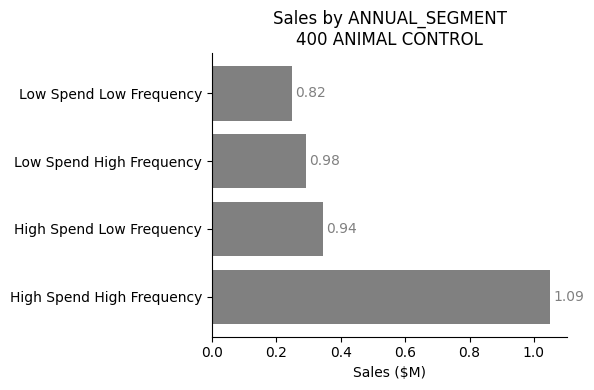

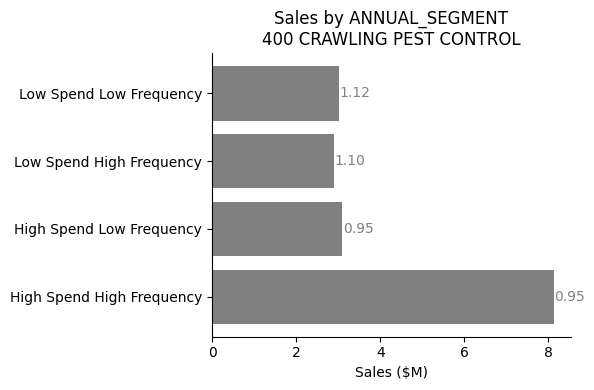

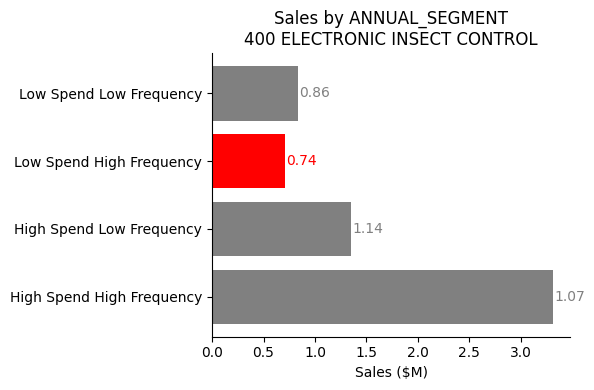

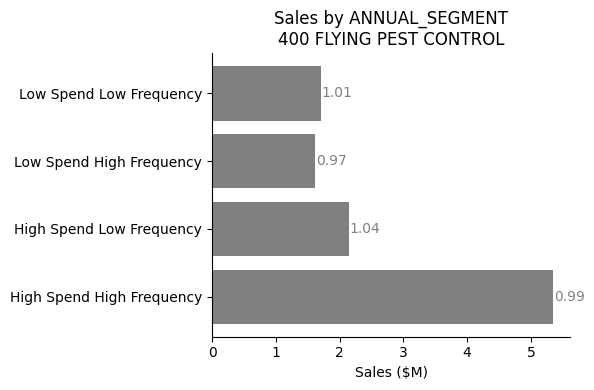

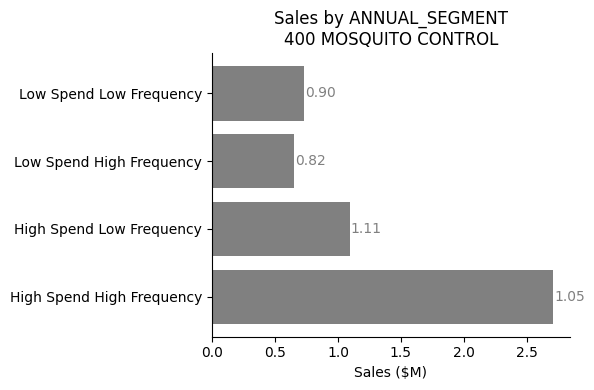

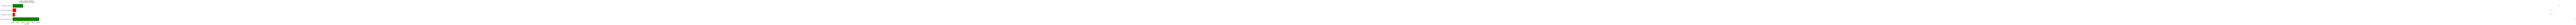

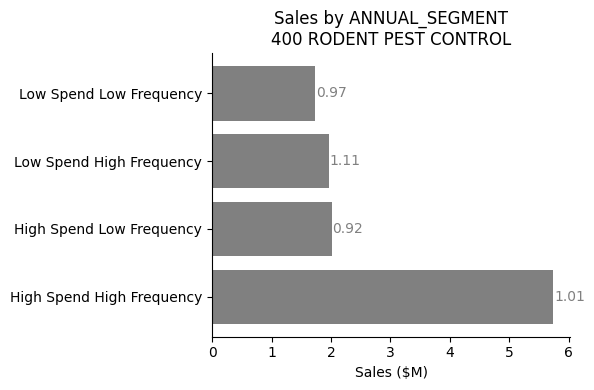

In [58]:
generate_segment_charts(df=PC_rfm, field="ANNUAL_SEGMENT", level="ITEM_SUB_DEPARTMENT_NAME")

## Commercial BOT (NZ)

In [59]:
# Get data
PC_bot = con.read_sql_file_into_pandas(
    file="sql/4-commercial-bot.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'NZ' 
    }
)

In [60]:
# Check data
PC_bot.head()

,ITEM_SUB_DEPARTMENT_NAME,INDUSTRY_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,400 ANIMAL CONTROL,B&O,11883.31,428.0,206,17073.19,617.0,375,1752259.57,107684.0,...,30182,0.696022,0.693679,0.549333,0.692099,0.693318,0.556789,1.005667,1.000521,0.986609
1,400 ANIMAL CONTROL,Builder,2409.93,82.0,78,17073.19,617.0,375,372876.75,22312.0,...,30182,0.141153,0.132901,0.208000,0.147277,0.143655,0.200616,0.958417,0.925144,1.036807
2,400 ANIMAL CONTROL,Trades,2779.95,107.0,91,17073.19,617.0,375,406626.25,25319.0,...,30182,0.162825,0.173420,0.242667,0.160607,0.163015,0.242562,1.013811,1.063827,1.000433
3,400 CRAWLING PEST CONTROL,B&O,685136.15,33358.0,8372,985926.91,47904.0,15044,1752259.57,107684.0,...,30182,0.694916,0.696351,0.556501,0.692099,0.693318,0.556789,1.004069,1.004375,0.999483
4,400 CRAWLING PEST CONTROL,Builder,142451.80,6799.0,3094,985926.91,47904.0,15044,372876.75,22312.0,...,30182,0.144485,0.141930,0.205663,0.147277,0.143655,0.200616,0.981043,0.987993,1.025158


/tmp/ipykernel_743/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'400 ANIMAL CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 CRAWLING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 ELECTRONIC INSECT CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 FLYING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 HOUSEHOLD PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 MOSQUITO CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 RODENT PEST CONTROL': <Figure size 600x400 with 1 Axes>}

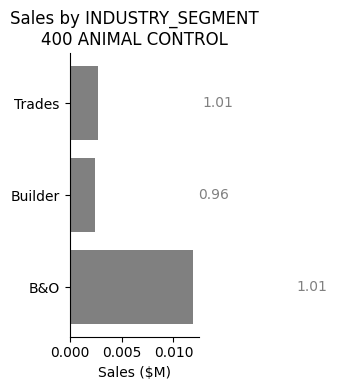

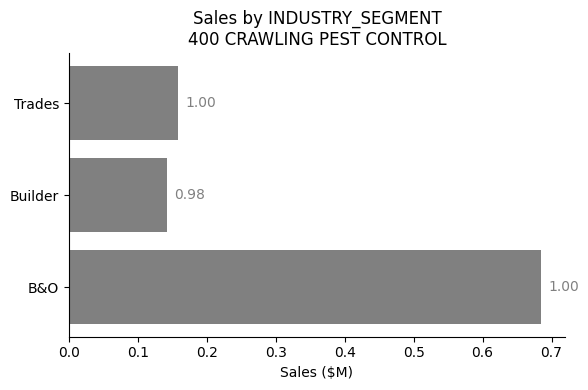

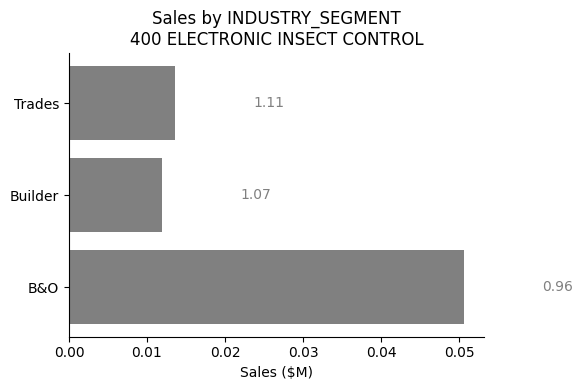

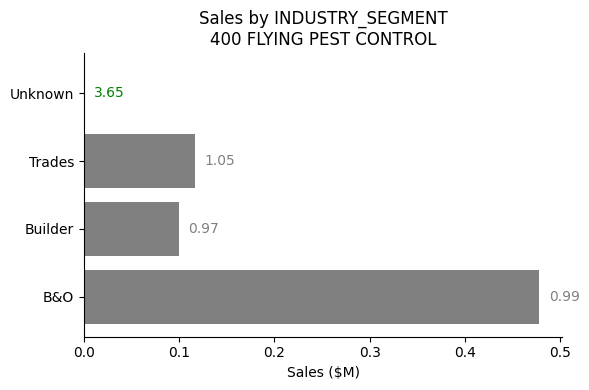

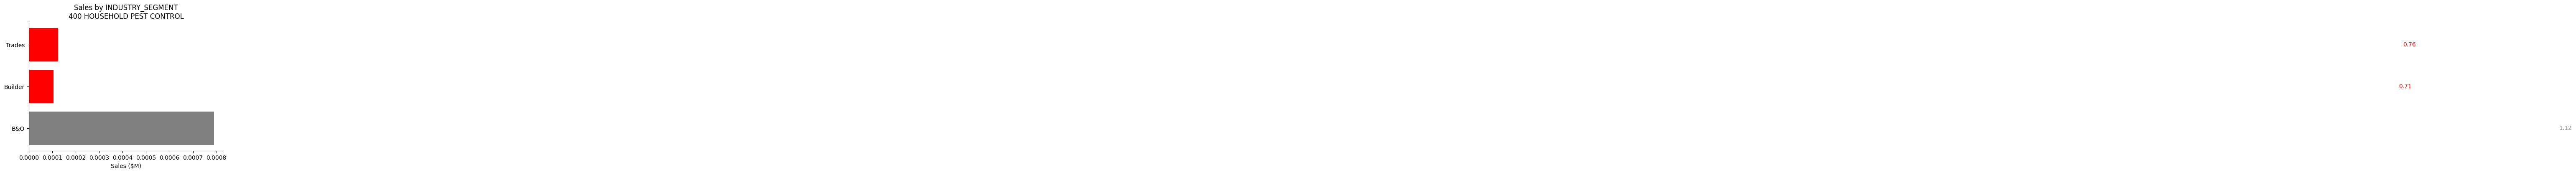

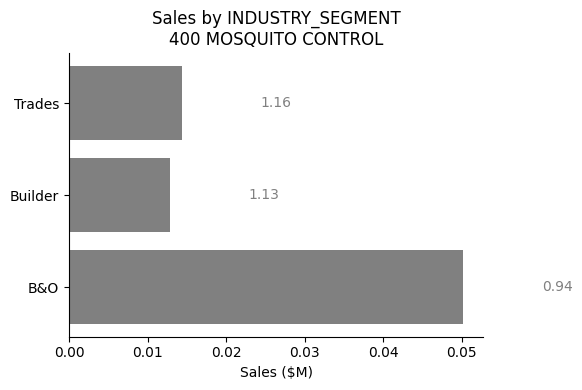

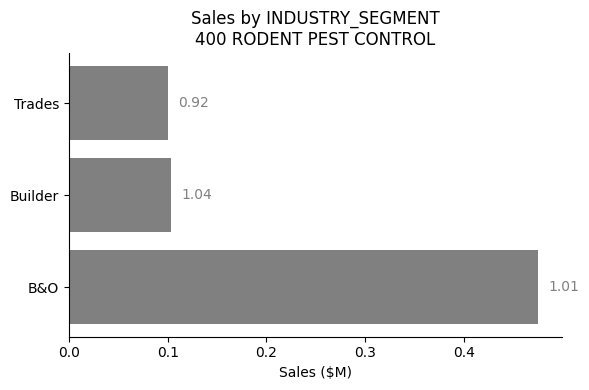

In [61]:
generate_segment_charts(df=PC_bot, field="INDUSTRY_SEGMENT", level="ITEM_SUB_DEPARTMENT_NAME")

## Commercial Industry Segment (NZ)

In [62]:
# Get data
PC_is = con.read_sql_file_into_pandas(
    file="sql/5-commercial-industry-segment.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'n_commercial_segments': 10, 
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'NZ' 
    }
)

In [63]:
# Check data
PC_is.sort_values(by='SALES_INDEX', ascending=False)

,ITEM_SUB_DEPARTMENT_NAME,INDUSTRY_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
41,400 HOUSEHOLD PEST CONTROL,Carpentry Services,22.74,6.0,4,544.68,145.0,74,23774.99,1383.0,...,17341,0.041749,0.041379,0.054054,0.018412,0.017544,0.025258,2.267530,2.358651,2.140074
21,400 ELECTRONIC INSECT CONTROL,Carpentry Services,1452.94,50.0,35,41562.85,1721.0,945,23774.99,1383.0,...,17341,0.034958,0.029053,0.037037,0.018412,0.017544,0.025258,1.898657,1.656035,1.466347
5,400 ANIMAL CONTROL,Landscaper and Gardening Services,557.73,21.0,18,8292.39,306.0,213,52476.14,3304.0,...,17341,0.067258,0.068627,0.084507,0.040638,0.041912,0.059224,1.655034,1.637421,1.426905
53,400 MOSQUITO CONTROL,Commercial Builder,1926.21,232.0,67,39473.97,5160.0,1553,43399.90,2647.0,...,17341,0.048797,0.044961,0.043142,0.033610,0.033578,0.032293,1.451873,1.339019,1.335955
23,400 ELECTRONIC INSECT CONTROL,Commercial Builder,1959.09,62.0,48,41562.85,1721.0,945,43399.90,2647.0,...,17341,0.047136,0.036026,0.050794,0.033610,0.033578,0.032293,1.402442,1.072900,1.572911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,400 ANIMAL CONTROL,Accommodation and Food Services,365.81,14.0,14,8292.39,306.0,213,92854.04,6048.0,...,17341,0.044114,0.045752,0.065728,0.071908,0.076720,0.074160,0.613479,0.596345,0.886300
52,400 MOSQUITO CONTROL,Cleaning Services,925.12,111.0,54,39473.97,5160.0,1553,52781.34,3177.0,...,17341,0.023436,0.021512,0.034771,0.040875,0.040301,0.041405,0.573365,0.533775,0.839778
22,400 ELECTRONIC INSECT CONTROL,Cleaning Services,857.94,47.0,41,41562.85,1721.0,945,52781.34,3177.0,...,17341,0.020642,0.027310,0.043386,0.040875,0.040301,0.041405,0.505005,0.677645,1.047844
1,400 ANIMAL CONTROL,Carpentry Services,73.32,3.0,3,8292.39,306.0,213,23774.99,1383.0,...,17341,0.008842,0.009804,0.014085,0.018412,0.017544,0.025258,0.480227,0.558831,0.557645


/tmp/ipykernel_743/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/tmp/ipykernel_743/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/tmp/ipykernel_743/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/tmp/ipykernel_743/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'400 ANIMAL CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 CRAWLING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 ELECTRONIC INSECT CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 FLYING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 HOUSEHOLD PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 MOSQUITO CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 RODENT PEST CONTROL': <Figure size 600x400 with 1 Axes>}

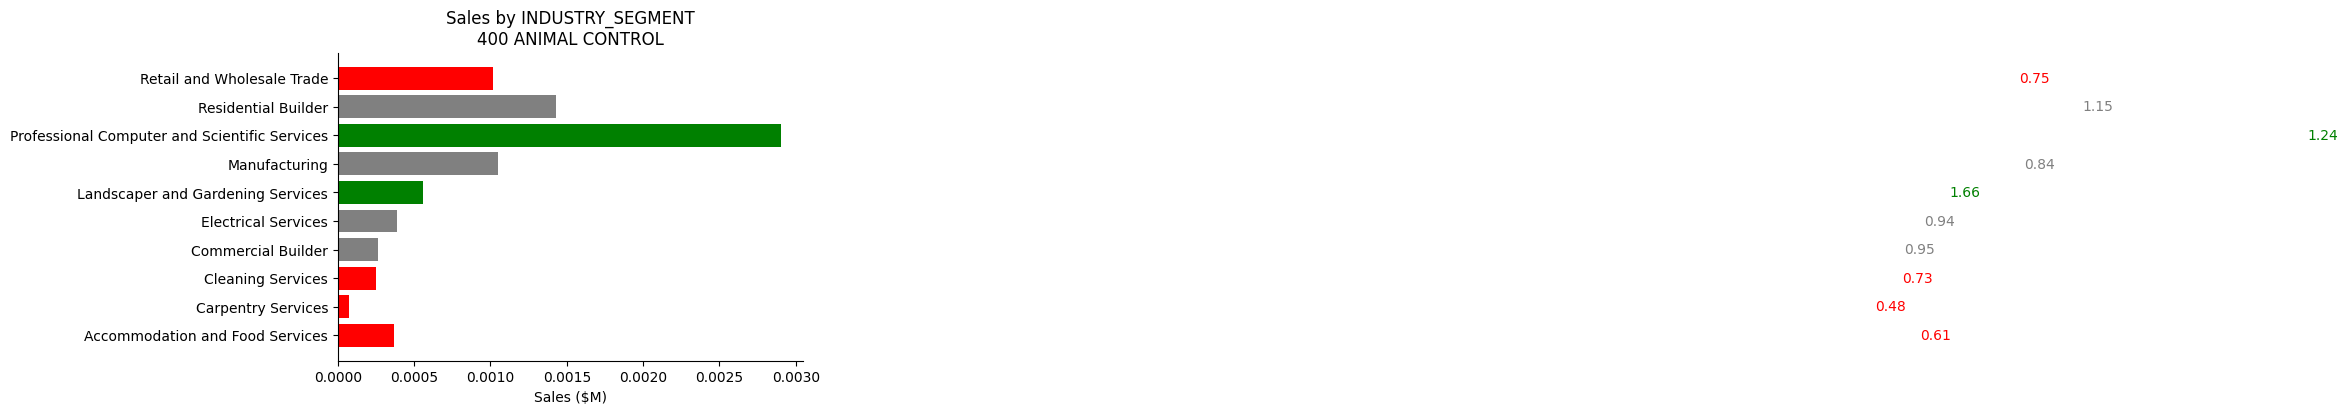

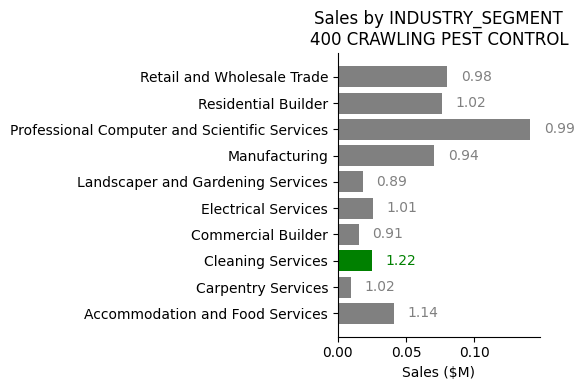

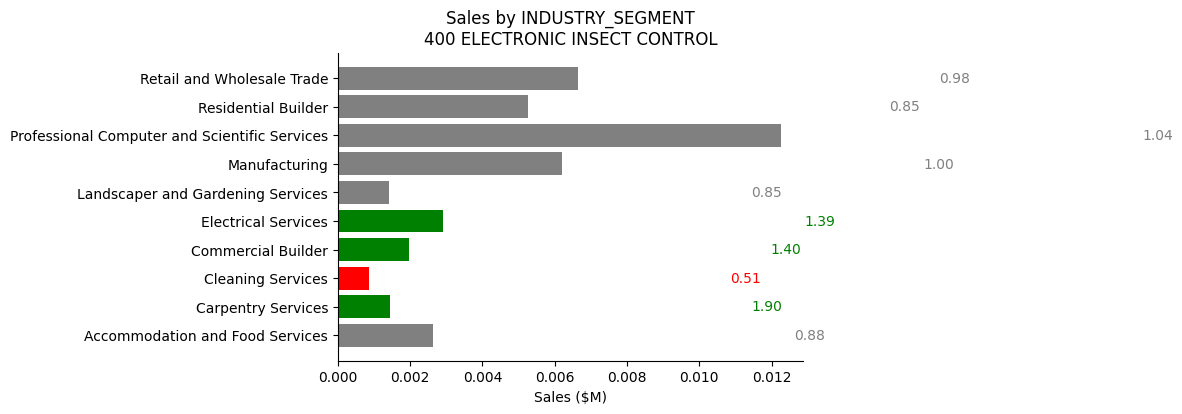

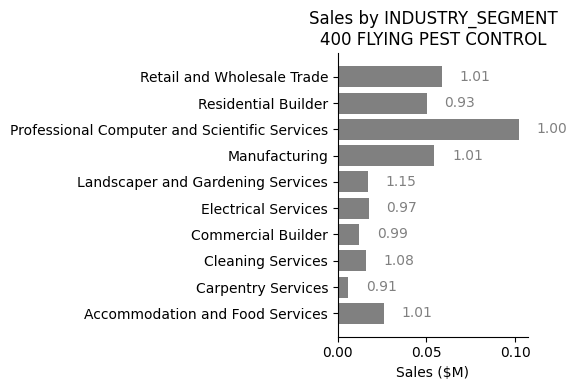

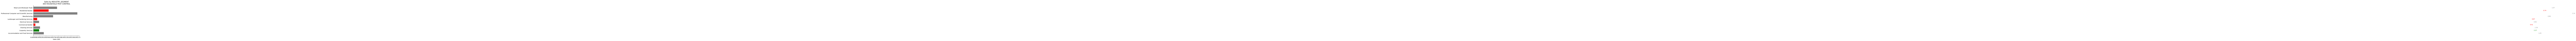

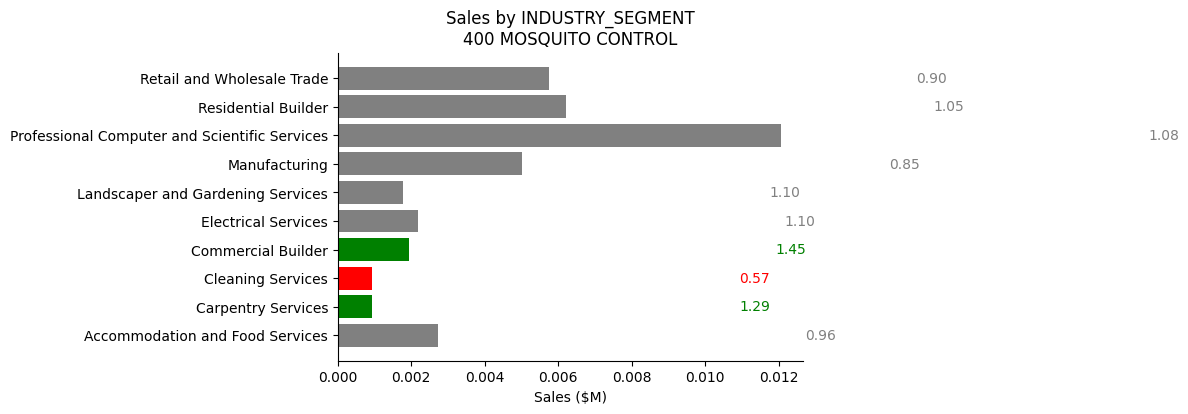

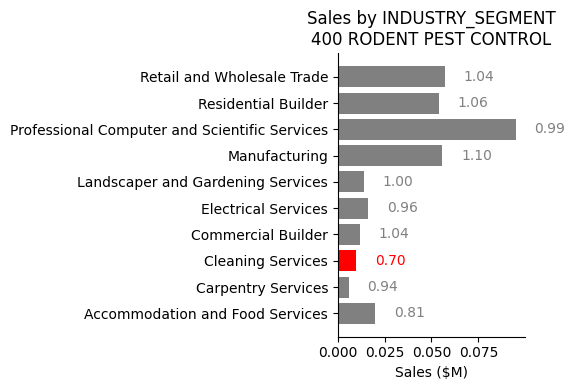

In [64]:
generate_segment_charts(df=PC_is, field="INDUSTRY_SEGMENT", level="ITEM_SUB_DEPARTMENT_NAME")

## Drop item range table

In [65]:
# Drop item range table
con.execute_statement_from_sql_string(
    statement='DROP TABLE bdwprd_de.ia_merch_de.{table_name};',
    formatting={'table_name': table_PC}
    )

# 400 RODENT PEST CONTROL

## Data

In [83]:
# Set item range table name
table_PC = 'PC_item_range' + datetime.today().strftime('%Y_%m_%d')

In [84]:
# Create temp item table
con.execute_statement_from_sql_file(
    file='sql/0-item-range.sql',
    formatting={'table_name': table_PC,
                'filter' : "AND item_sub_department_name = '400 RODENT PEST CONTROL' "})

## Demographic Segments (AU)

In [85]:
PC_ds = con.read_sql_file_into_pandas(
    file="sql/1-demographic-segments.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_PC,
        'level' : 'item_class_name',
        'country' : 'AU' 
    }
)

In [86]:
PC_ds

,ITEM_CLASS_NAME,DEMOGRAPHIC_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,500 RODENT POISON,Homeowner older kids,482871.29,38847.0,24378,6583657.63,537996.0,325748,929772.57,74269.0,...,460416,0.073344,0.072207,0.074837,0.078366,0.075884,0.075697,0.935919,0.951546,0.988639
1,500 RODENT POISON,Homeowner younger kids,884279.52,73063.0,47627,6583657.63,537996.0,325748,1888397.68,153757.0,...,460416,0.134314,0.135806,0.146208,0.159163,0.157100,0.155136,0.843878,0.864455,0.942450
2,500 RODENT POISON,Older homeowner,3842599.08,308893.0,176581,6583657.63,537996.0,325748,6040871.15,493919.0,...,460416,0.583657,0.574155,0.542079,0.509154,0.504658,0.505430,1.146328,1.137712,1.072511
3,500 RODENT POISON,Renter no kids,302314.85,28228.0,19955,6583657.63,537996.0,325748,755838.65,69596.0,...,460416,0.045919,0.052469,0.061259,0.063706,0.071109,0.074576,0.720799,0.737863,0.821430
4,500 RODENT POISON,Renter with kids,295709.26,27534.0,19196,6583657.63,537996.0,325748,752507.59,68566.0,...,460416,0.044916,0.051179,0.058929,0.063425,0.070057,0.069985,0.708170,0.730534,0.842023
5,500 RODENT POISON,Unclassifiable,64457.95,5175.0,3039,6583657.63,537996.0,325748,102800.83,8433.0,...,460416,0.009791,0.009619,0.009329,0.008665,0.008616,0.008801,1.129961,1.116370,1.059993
6,500 RODENT POISON,Younger homeowner,711425.68,56256.0,34972,6583657.63,537996.0,325748,1394348.24,110181.0,...,460416,0.108059,0.104566,0.107359,0.117522,0.112577,0.110376,0.919479,0.928842,0.972666
7,500 RODENT REPELLENT,Homeowner older kids,61015.46,1656.0,1289,812161.62,22012.0,17091,929772.57,74269.0,...,460416,0.075127,0.075232,0.075420,0.078366,0.075884,0.075697,0.958675,0.991407,0.996341
8,500 RODENT REPELLENT,Homeowner younger kids,124591.69,3323.0,2651,812161.62,22012.0,17091,1888397.68,153757.0,...,460416,0.153408,0.150963,0.155111,0.159163,0.157100,0.155136,0.963838,0.960937,0.999839
9,500 RODENT REPELLENT,Older homeowner,387390.56,10441.0,7929,812161.62,22012.0,17091,6040871.15,493919.0,...,460416,0.476987,0.474332,0.463928,0.509154,0.504658,0.505430,0.936824,0.939909,0.917888


## Commercial Industry Segment (NZ)

In [89]:
# Get data
PC_is = con.read_sql_file_into_pandas(
    file="sql/5-commercial-industry-segment.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'n_commercial_segments': 10, 
        'table_name': table_PC,
        'level' : 'item_class_name',
        'country' : 'NZ' 
    }
)

In [90]:
# Check data
PC_is.sort_values(by='SALES_INDEX', ascending=False)

,ITEM_CLASS_NAME,INDUSTRY_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
10,500 RODENT REPELLENT,Accommodation and Food Services,2058.42,43.0,29,25054.95,553.0,338,19887.26,1147.0,...,6630,0.082156,0.077758,0.085799,0.058587,0.057888,0.069683,1.402299,1.343235,1.231276
22,500 RODENT TRAP,Cleaning Services,5323.08,410.0,145,143965.86,11374.0,3765,9737.75,661.0,...,6630,0.036975,0.036047,0.038513,0.028687,0.033360,0.036501,1.288902,1.080541,1.055122
16,500 RODENT REPELLENT,Manufacturing,4567.68,105.0,38,25054.95,553.0,338,55861.11,3148.0,...,6630,0.182306,0.189873,0.112426,0.164564,0.158878,0.090649,1.107816,1.195093,1.240234
24,500 RODENT TRAP,Electrical Services,7591.90,581.0,258,143965.86,11374.0,3765,16216.85,986.0,...,6630,0.052734,0.051081,0.068526,0.047774,0.049763,0.065008,1.103823,1.026498,1.054116
23,500 RODENT TRAP,Commercial Builder,5522.69,388.0,141,143965.86,11374.0,3765,11920.57,664.0,...,6630,0.038361,0.034113,0.037450,0.035117,0.033512,0.035596,1.092369,1.017941,1.052085
25,500 RODENT TRAP,Landscaper and Gardening Services,6224.18,467.0,226,143965.86,11374.0,3765,13773.32,826.0,...,6630,0.043234,0.041059,0.060027,0.040575,0.041688,0.060181,1.065514,0.984908,0.997441
15,500 RODENT REPELLENT,Landscaper and Gardening Services,1076.92,23.0,21,25054.95,553.0,338,13773.32,826.0,...,6630,0.042982,0.041591,0.062130,0.040575,0.041688,0.060181,1.059318,0.997688,1.032386
7,500 RODENT POISON,Professional Computer and Scientific Services,50487.02,2410.0,848,170428.63,7887.0,4243,94981.60,5602.0,...,6630,0.296236,0.305566,0.199859,0.279811,0.282729,0.193514,1.058700,1.080772,1.032788
9,500 RODENT POISON,Retail and Wholesale Trade,30407.46,1433.0,986,170428.63,7887.0,4243,57252.67,3390.0,...,6630,0.178418,0.181691,0.232383,0.168663,0.171091,0.226395,1.057833,1.061957,1.026449
14,500 RODENT REPELLENT,Electrical Services,1260.85,28.0,23,25054.95,553.0,338,16216.85,986.0,...,6630,0.050323,0.050633,0.068047,0.047774,0.049763,0.065008,1.053364,1.017485,1.046748


## Drop item range table

In [91]:
# Drop item range table
con.execute_statement_from_sql_string(
    statement='DROP TABLE bdwprd_de.ia_merch_de.{table_name};',
    formatting={'table_name': table_PC}
    )

# 400 GROWING MEDIA

## Data

In [92]:
# Set item range table name
table_GM = 'GM_item_range' + datetime.today().strftime('%Y_%m_%d')

In [93]:
# Create temp item table
con.execute_statement_from_sql_file(
    file='sql/0-item-range.sql',
    formatting={'table_name': table_GM,
                'filter' : "AND item_sub_department_name = '400 GROWING MEDIA' "})

## Demographic Segments (AU)

In [94]:
GM_ds = con.read_sql_file_into_pandas(
    file="sql/1-demographic-segments.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_GM,
        'level' : 'item_class_name',
        'country' : 'AU' 
    }
)

In [95]:
# Check data
GM_ds.head()

,ITEM_CLASS_NAME,DEMOGRAPHIC_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,500 COIR MULCH BLOCK HYDRO,Homeowner older kids,95123.55,5016.0,2533,1154692.33,60457.0,30321,11689772.71,1368424.0,...,2586396,0.082380,0.082968,0.083539,0.072809,0.073879,0.074010,1.131452,1.123025,1.128753
1,500 COIR MULCH BLOCK HYDRO,Homeowner younger kids,181942.74,9600.0,4947,1154692.33,60457.0,30321,22024815.44,2608953.0,...,2586396,0.157568,0.158791,0.163154,0.137180,0.140853,0.141790,1.148621,1.127347,1.150674
2,500 COIR MULCH BLOCK HYDRO,Older homeowner,542914.86,27680.0,13289,1154692.33,60457.0,30321,87718074.28,9988801.0,...,2586396,0.470181,0.457846,0.438277,0.546347,0.539280,0.487794,0.860591,0.848995,0.898488
3,500 COIR MULCH BLOCK HYDRO,Renter no kids,82751.32,4634.0,2818,1154692.33,60457.0,30321,9102008.31,1082689.0,...,2586396,0.071665,0.076650,0.092939,0.056691,0.058453,0.103666,1.264131,1.311308,0.896523
4,500 COIR MULCH BLOCK HYDRO,Renter with kids,45263.56,2565.0,1605,1154692.33,60457.0,30321,5483066.64,677028.0,...,2586396,0.039200,0.042427,0.052934,0.034151,0.036552,0.065596,1.147835,1.160735,0.806970


{'500 COIR MULCH BLOCK HYDRO': <Figure size 600x400 with 1 Axes>,
 '500 COIR POTTING MIX BLOCK': <Figure size 600x400 with 1 Axes>,
 '500 COMPOSTS SOIL CONDITIONERS': <Figure size 600x400 with 1 Axes>,
 '500 MANURE': <Figure size 600x400 with 1 Axes>,
 '500 MULCHES': <Figure size 600x400 with 1 Axes>,
 '500 POTTING MIXES': <Figure size 600x400 with 1 Axes>,
 '500 SMALL BAG POTTING MIX': <Figure size 600x400 with 1 Axes>}

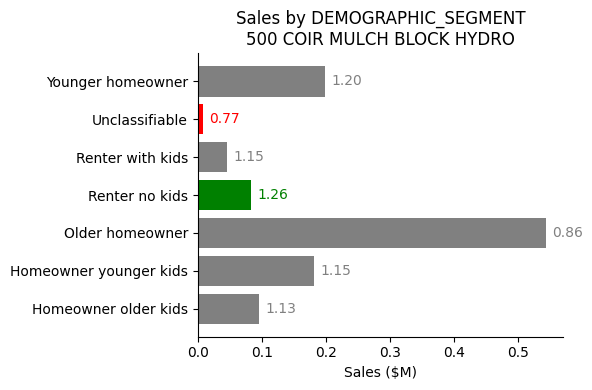

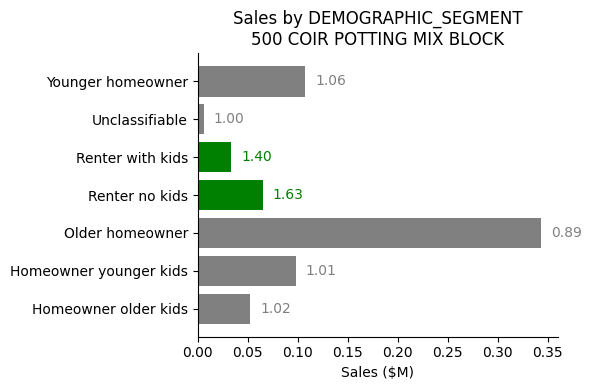

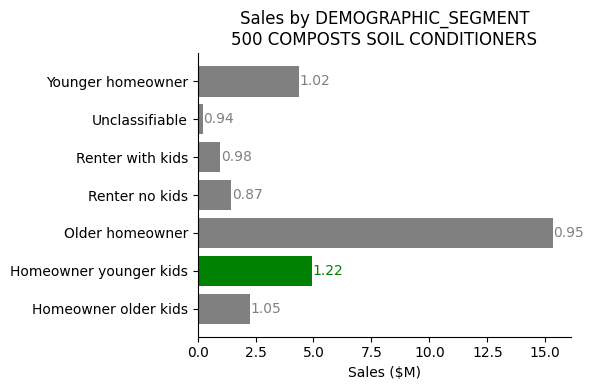

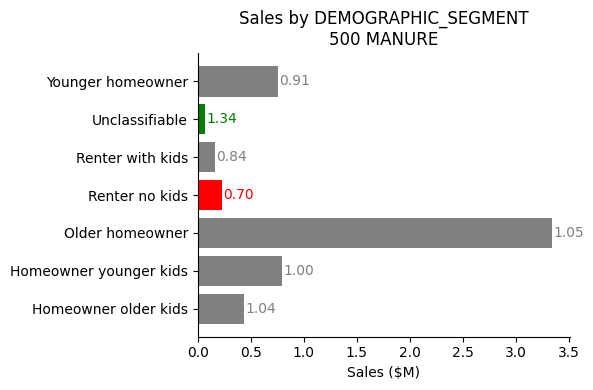

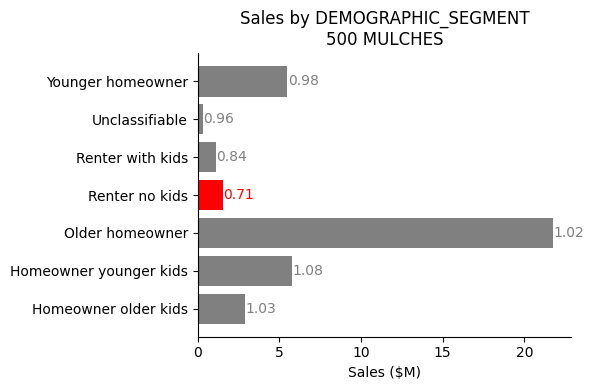

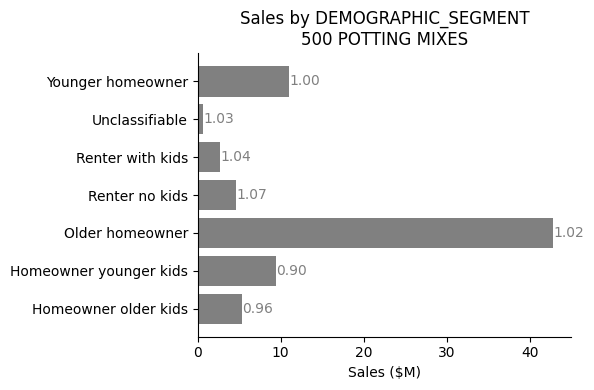

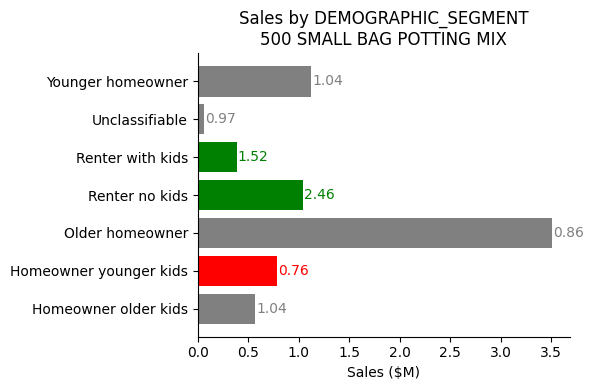

In [96]:
generate_segment_charts(df=GM_ds, field="DEMOGRAPHIC_SEGMENT", level="ITEM_CLASS_NAME")

## Commercial Industry Segment (NZ)

In [97]:
# Get data
GM_is = con.read_sql_file_into_pandas(
    file="sql/5-commercial-industry-segment.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'n_commercial_segments': 10, 
        'table_name': table_GM,
        'level' : 'item_class_name',
        'country' : 'NZ' 
    }
)

In [98]:
# Check data
GM_is.sort_values(by='SALES_INDEX', ascending=False)

,ITEM_CLASS_NAME,INDUSTRY_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
2,500 COIR POTTING MIX BLOCK,Cleaning Services,516.47,91.0,22,12080.31,1988.0,419,66131.70,7776.0,...,20236,0.042753,0.045775,0.052506,0.030996,0.031208,0.040522,1.379325,1.466755,1.295741
23,500 MULCHES,Commercial Builder,13716.87,1501.0,156,362386.55,38391.0,4234,60056.54,6922.0,...,20236,0.037851,0.039098,0.036845,0.028148,0.027781,0.028415,1.344721,1.407371,1.296674
22,500 MULCHES,Cleaning Services,14780.39,1653.0,164,362386.55,38391.0,4234,66131.70,7776.0,...,20236,0.040786,0.043057,0.038734,0.030996,0.031208,0.040522,1.315872,1.379672,0.955876
0,500 COIR POTTING MIX BLOCK,Accommodation and Food Services,844.32,126.0,41,12080.31,1988.0,419,117799.87,13723.0,...,20236,0.069892,0.063380,0.097852,0.055212,0.055076,0.073681,1.265883,1.150784,1.328049
21,500 MULCHES,Carpentry Services,7208.53,420.0,75,362386.55,38391.0,4234,33774.00,3672.0,...,20236,0.019892,0.010940,0.017714,0.015830,0.014737,0.022238,1.256613,0.742345,0.796564
5,500 COIR POTTING MIX BLOCK,Landscaper and Gardening Services,1357.56,225.0,46,12080.31,1988.0,419,197179.81,22659.0,...,20236,0.112378,0.113179,0.109785,0.092417,0.090939,0.073483,1.215984,1.244555,1.494019
14,500 COMPOSTS SOIL CONDITIONERS,Electrical Services,30773.35,4202.0,733,669842.39,93511.0,10818,85105.83,10013.0,...,20236,0.045941,0.044936,0.067757,0.039889,0.040186,0.064835,1.151734,1.118196,1.045068
37,500 POTTING MIX SMALL BAG,Professional Computer and Scientific Services,36314.38,4152.0,913,106101.96,11899.0,4318,653935.46,76660.0,...,20236,0.342259,0.348937,0.211440,0.306496,0.307666,0.208687,1.116683,1.134140,1.013192
8,500 COIR POTTING MIX BLOCK,Residential Builder,1967.68,439.0,61,12080.31,1988.0,419,311428.78,36080.0,...,20236,0.162883,0.220825,0.145585,0.145965,0.144803,0.186944,1.115905,1.525002,0.778763
4,500 COIR POTTING MIX BLOCK,Electrical Services,536.09,97.0,26,12080.31,1988.0,419,85105.83,10013.0,...,20236,0.044377,0.048793,0.062053,0.039889,0.040186,0.064835,1.112525,1.214171,0.957091


## Drop item range table

In [99]:
# Drop item range table
con.execute_statement_from_sql_string(
    statement='DROP TABLE bdwprd_de.ia_merch_de.{table_name};',
    formatting={'table_name': table_GM}
    )